# Custom MLP Regression Analysis using NumPy

In this Jupyter notebook, we delve into the intricacies of implementing a Multilayer Perceptron (MLP) model purely using NumPy. The focus is on understanding the underlying mechanics of MLPs for regression tasks, demonstrating the forward propagation, backpropagation, and gradient descent optimization from scratch.

## Objective
To demystify the process of building and training an MLP for regression using low-level operations, providing deep insights into the algorithmic foundations of neural networks.

## Dataset
A synthetic dataset is used to streamline our focus towards the implementation details and training process of the MLP without the overhead of data preprocessing.

## Highlights
- **NumPy Implementation**: Detailed construction of `MLPReg`, an MLP model, using NumPy to highlight manual computation of forward and backward passes.
- **Training Process**: A step-by-step guide to training the MLP model, including calculating the mean squared error (MSE) loss and updating model parameters using gradient descent.
- **Performance Evaluation**: Visualization of the model's predictions compared to actual data points, offering a clear view of the model's regression capabilities.

This notebook is for people looking to grasp the fundamentals of neural network implementation  without relying on high-level APIs or frameworks.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn

In [8]:
# Loading the data
X = np.array([0.5503, 0.9206, 0.5359, 0.6081, 0.0202, 0.8545, 0.2357, 0.4847, 0.3996, 0.1957])[:,None]
y = np.array([-0.5894,-0.2507 ,-0.0468 ,-0.3402  ,0.2857 ,-1.0683  ,0.8605 ,-0.0801  ,0.6837, 1.185 ])[:,None]
X = torch.tensor(X,dtype = torch.float)
y = torch.tensor(y,dtype = torch.float)

## Implementation of an MLP using numpy

In [9]:
class MLPReg:
    """
    A simple implementation of a Multilayer Perceptron (MLP) for regression.
    This class includes methods for forward propagation, gradient update, fitting the model to the data,
    and calculating the mean squared error.
    """

    def __init__(self):
        """Initializes the MLP model with random weights and zero gradients."""
        self.w_21 = np.random.uniform(-0.5, 0.5, size=(4, 1))
        self.w_10 = np.random.uniform(-0.5, 0.5, size=(2, 3))
        self.w_21_d = np.zeros_like(self.w_21)
        self.w_10_d = np.zeros_like(self.w_10)

    def forward(self, x):
        """
        Performs forward propagation through the network.

        :param x: Input value.
        :return: The network's output.
        """
        self.h_0 = np.array([[1], [x]])
        self.h_1_no_bias = (self.h_0.T @ self.w_10).T
        self.s_1 = np.insert(np.tanh(self.h_1_no_bias), 0, 1)[:, None]
        self.h_2 = self.w_21.T @ self.s_1
        self.s_2 = self.h_2

        return self.s_2[0]

    def gradient_update(self, x, y):
        """
        Updates gradients for weights based on the error between predicted and true values.

        :param x: Input value.
        :param y: True output value.
        """
        y_pred = self.forward(x)
        ae = y_pred - y
        self.d_1 = (1 - (np.tanh(self.h_1_no_bias)) ** 2) * self.w_21[1:]
        self.w_21_d += ae * self.s_1
        self.w_10_d += ae * self.h_0 @ self.d_1.T

    def fit(self, X, y, delta=0.4):
        """
        Fits the model to the data using gradient descent.

        :param X: Input values.
        :param y: True output values.
        :param delta: Learning rate.
        """
        epoch = 0
        e = 1000
        while e >= 10**-5 and epoch <= 3000:
            self.w_21_d = np.zeros_like(self.w_21)
            self.w_10_d = np.zeros_like(self.w_10)
            np.vectorize(self.gradient_update, cache=True)(X, y)
            self.w_21 -= delta * 0.1 * self.w_21_d
            self.w_10 -= delta * 0.1 * self.w_10_d
            e = np.mean(np.vectorize(self.mse_error, cache=True)(X, y))
            if epoch % 100 == 0:
                print(f'Error at epoch {epoch}:', round(e, 3))
            epoch += 1

    def mse_error(self, x, y):
        """
        Calculates the mean squared error for a given input and its true value.

        :param x: Input value.
        :param y: True output value.
        :return: Mean squared error.
        """
        mse = 0.5 * ((self.forward(x) - y) ** 2)
        return mse


Error at epoch 0: 0.239
Error at epoch 100: 0.088
Error at epoch 200: 0.086
Error at epoch 300: 0.084
Error at epoch 400: 0.081
Error at epoch 500: 0.078
Error at epoch 600: 0.075
Error at epoch 700: 0.071
Error at epoch 800: 0.067
Error at epoch 900: 0.061
Error at epoch 1000: 0.054
Error at epoch 1100: 0.047
Error at epoch 1200: 0.039
Error at epoch 1300: 0.034
Error at epoch 1400: 0.106
Error at epoch 1500: 0.031
Error at epoch 1600: 0.029
Error at epoch 1700: 0.028
Error at epoch 1800: 0.028
Error at epoch 1900: 0.034
Error at epoch 2000: 0.028
Error at epoch 2100: 0.027
Error at epoch 2200: 0.027
Error at epoch 2300: 0.027
Error at epoch 2400: 0.027
Error at epoch 2500: 0.027
Error at epoch 2600: 0.027
Error at epoch 2700: 0.027
Error at epoch 2800: 0.027
Error at epoch 2900: 0.027
Error at epoch 3000: 0.027


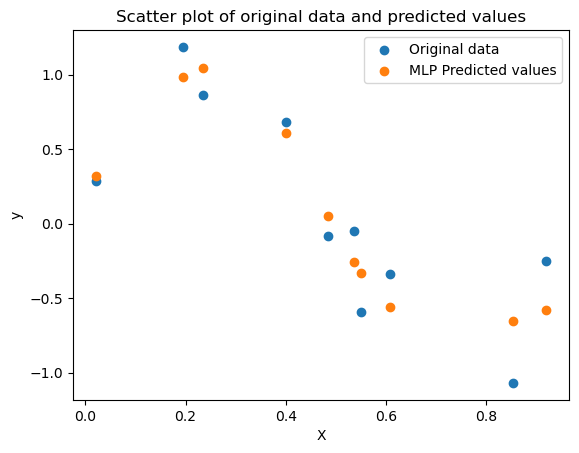

In [10]:
%matplotlib inline
mlp = MLPReg()
mlp.fit(X,y)

plt.scatter(X, y, label='Original data')
plt.scatter(X, np.vectorize(mlp.forward)(X), label='MLP Predicted values')
plt.title('Scatter plot of original data and predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## MLP implementation using Pytorch

In [11]:
class NeuralNetwork(nn.Module):
    """
    A simple neural network for regression with one hidden layer using PyTorch.
    The network architecture is as follows:
    - Input layer to hidden layer: Linear transformation with 1 input feature and 3 output features.
    - Activation function: Tanh
    - Hidden layer to output layer: Linear transformation with 3 input features and 1 output feature.
    """
    
    def __init__(self):
        """
        Initializes the neural network components and customizes the initial weights and biases.
        """
        super().__init__()
        # Define layers
        self.layer1 = nn.Linear(1, 3)
        self.layer2 = nn.Tanh()
        self.layer3 = nn.Linear(3, 1)
        
        # Initialize weights and biases
        self.layer1.weight.data.uniform_(-0.5, 0.5)
        self.layer1.bias.data.uniform_(-0.5, 0.5)
        self.layer3.weight.data.uniform_(-0.5, 0.5)
        self.layer3.bias.data.uniform_(-0.5, 0.5)

    def forward(self, x):
        """
        Defines the forward pass of the neural network.

        :param x: The input tensor.
        :return: The output tensor after passing through the network.
        """
        out_layer1 = self.layer1(x)
        out_layer2 = self.layer2(out_layer1)
        y_pred = self.layer3(out_layer2)
        return y_pred


Error at epoch 0: 0.428
Error at epoch 100: 0.172
Error at epoch 200: 0.162
Error at epoch 300: 0.148
Error at epoch 400: 0.115
Error at epoch 500: 0.091
Error at epoch 600: 0.163
Error at epoch 700: 0.515
Error at epoch 800: 0.073
Error at epoch 900: 0.171
Error at epoch 1000: 0.127
Error at epoch 1100: 0.121
Error at epoch 1200: 0.11
Error at epoch 1300: 0.1
Error at epoch 1400: 0.093
Error at epoch 1500: 0.088
Error at epoch 1600: 0.085
Error at epoch 1700: 0.082
Error at epoch 1800: 0.081
Error at epoch 1900: 0.08
Error at epoch 2000: 0.079
Error at epoch 2100: 0.079
Error at epoch 2200: 0.078
Error at epoch 2300: 0.078
Error at epoch 2400: 0.078
Error at epoch 2500: 0.078
Error at epoch 2600: 0.077
Error at epoch 2700: 0.077
Error at epoch 2800: 0.077
Error at epoch 2900: 0.077
Error at epoch 3000: 0.077
Error at epoch 3100: 0.077
Error at epoch 3200: 0.076
Error at epoch 3300: 0.076
Error at epoch 3400: 0.076
Error at epoch 3500: 0.076
Error at epoch 3600: 0.076
Error at epoch 37

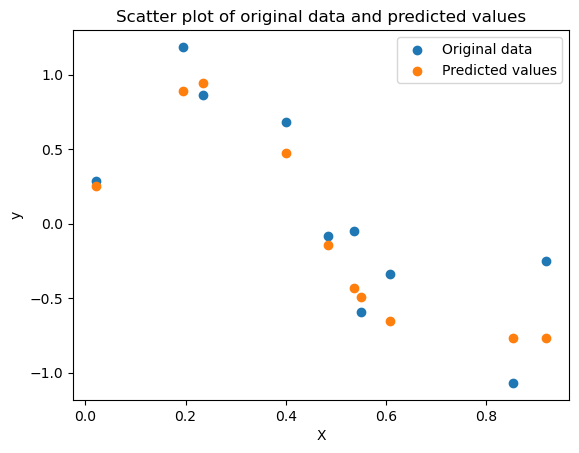

In [12]:
%matplotlib inline

model = NeuralNetwork()  # Instantiate the model

criterion = torch.nn.MSELoss()  # Define the loss function
lr = 0.5  # Set the learning rate

# Training loop
for epoch in range(5000):
    model.zero_grad()  # Zero the gradients at the start of each epoch
    y_pred = model(X)  # Forward pass: Compute the predicted y by passing x to the model
    loss = criterion(y_pred, y)  # Compute the loss
    
    # Print error information every 100 epochs
    if epoch % 100 == 0: 
        print(f'Error at epoch {epoch}:', np.round(loss.item(), 3))

    loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters

    # Update model parameters
    for name, param in model.named_parameters():
        with torch.no_grad():
            param -= lr * param.grad  # Update parameters using gradient descent
            
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.scatter(X.numpy(), model(X).detach().numpy(), label='Predicted values')
plt.title('Scatter plot of original data and predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()